In [1]:
import cv2.cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dark_horse = cv.imread('../computer_vision/DATA/horse.jpg')
show_horse = cv.cvtColor(dark_horse,cv.COLOR_BGR2RGB)

rainbow = cv.imread('../computer_vision/DATA/rainbow.jpg')
show_rainbow = cv.cvtColor(rainbow,cv.COLOR_BGR2RGB)

blue_bricks = cv.imread('../computer_vision/DATA/bricks.jpg')
show_bricks = cv.cvtColor(blue_bricks,cv.COLOR_BGR2RGB)

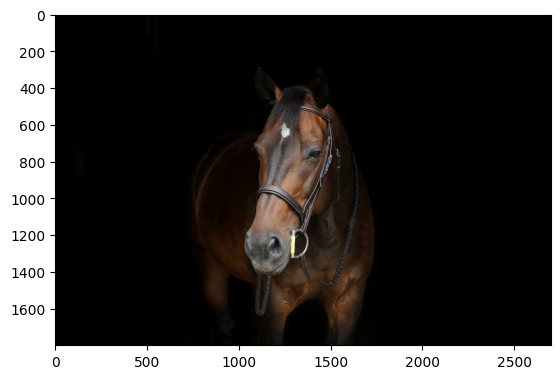

In [3]:
plt.imshow(show_horse)

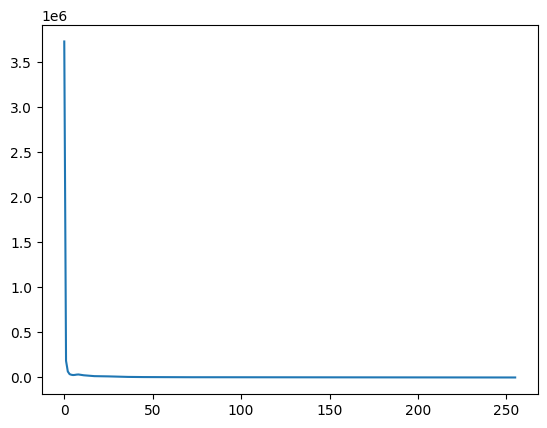

In [8]:
hist_values = cv.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

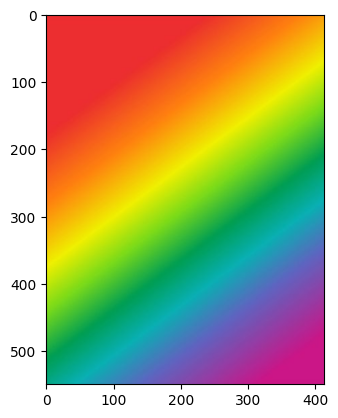

In [4]:
plt.imshow(show_rainbow)

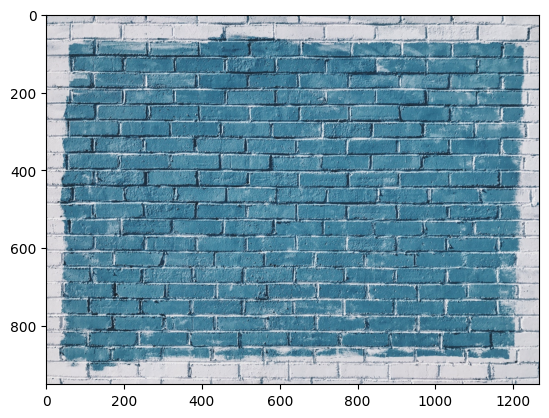

In [5]:
plt.imshow(show_bricks)

In [6]:
hist_values = cv.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_values.shape

(256, 1)

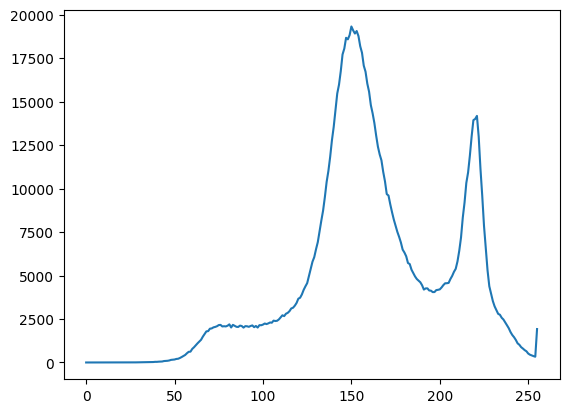

In [7]:
plt.plot(hist_values)

Text(0.5, 1.0, 'HISTOGRAM for blue bricks')

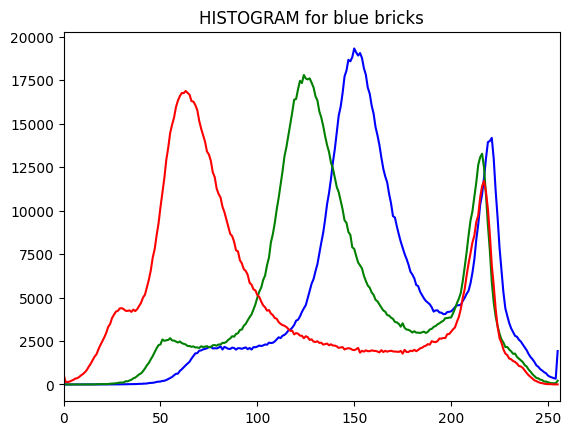

In [9]:
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.title('HISTOGRAM for blue bricks')

Text(0.5, 1.0, 'HISTOGRAM for horse')

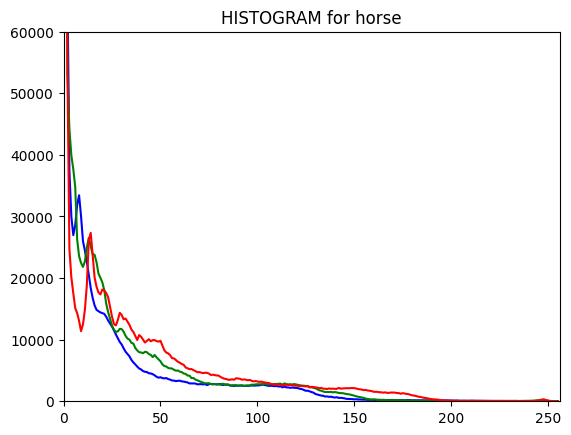

In [16]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    plt.ylim([0,60000])
plt.title('HISTOGRAM for horse')

In [17]:
img = rainbow
img.shape

(550, 413, 3)

In [19]:
mask = np.zeros(img.shape[:2],np.uint8)
mask.shape

(550, 413)

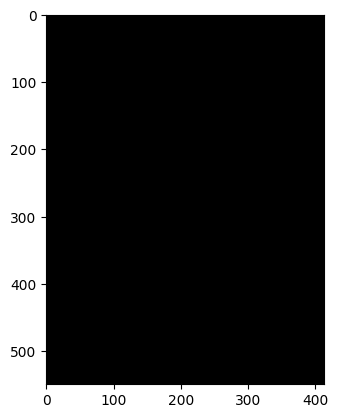

In [20]:
plt.imshow(mask,cmap='gray')

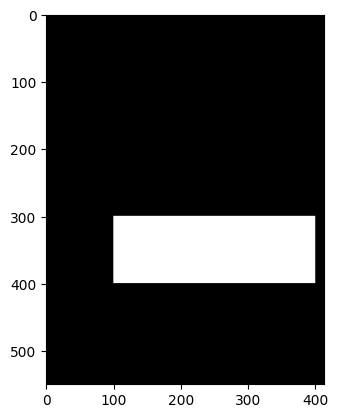

In [21]:
mask[300:400,100:400] = 255
plt.imshow(mask,cmap='gray')

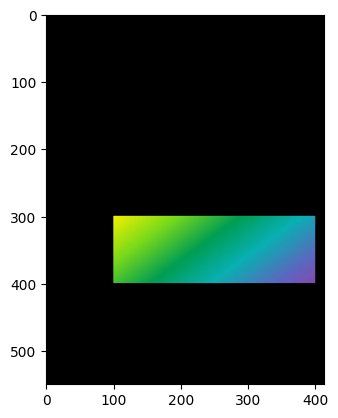

In [22]:
masked_img = cv.bitwise_and(img,img,mask=mask)
show_masked_img = cv.bitwise_and(show_rainbow,show_rainbow,mask=mask)
plt.imshow(show_masked_img)

In [23]:
hist_mask_values_red = cv.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_values_red = cv.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Red histogram for masked rainbow')

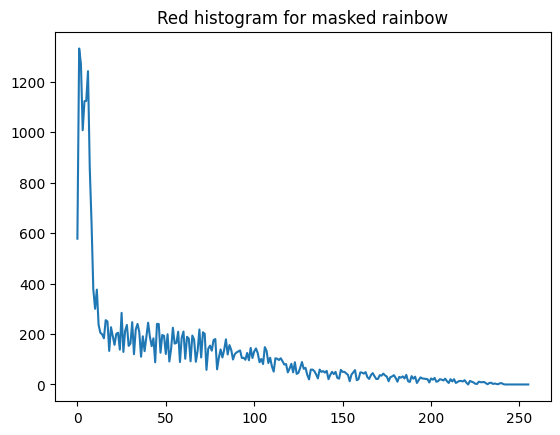

In [24]:
plt.plot(hist_mask_values_red)
plt.title('Red histogram for masked rainbow')

Text(0.5, 1.0, 'Red histogram for full rainbow')

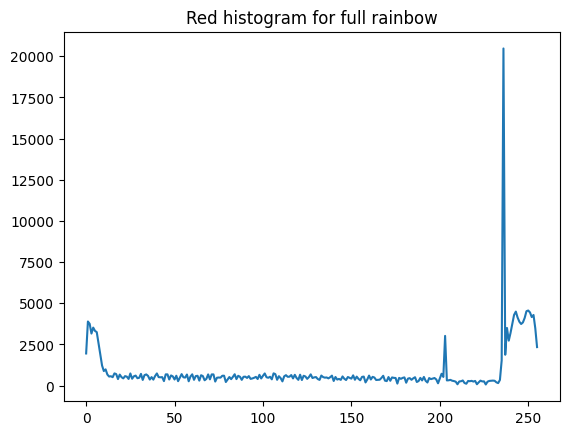

In [25]:
plt.plot(hist_values_red)
plt.title('Red histogram for full rainbow')


In [26]:
def display_img(img):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

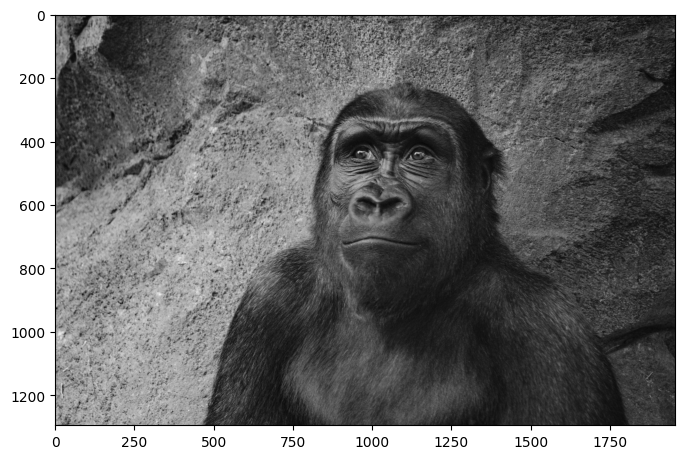

In [27]:
gorilla = cv.imread('../computer_vision/DATA/gorilla.jpg',0)
display_img(gorilla)

In [28]:
gorilla.shape

(1295, 1955)

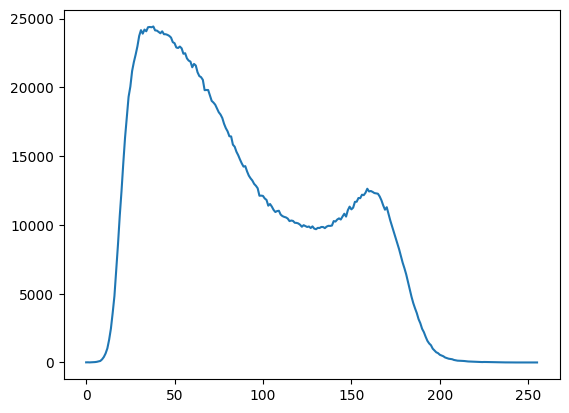

In [29]:
hist_values = cv.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

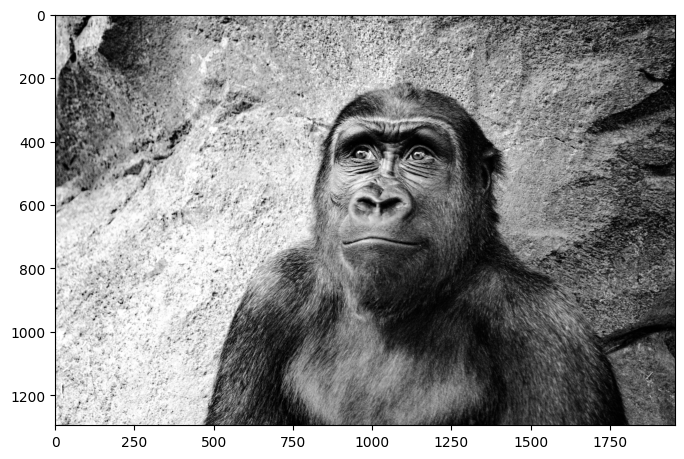

In [30]:
equalized_gorilla = cv.equalizeHist(gorilla)
display_img(equalized_gorilla)

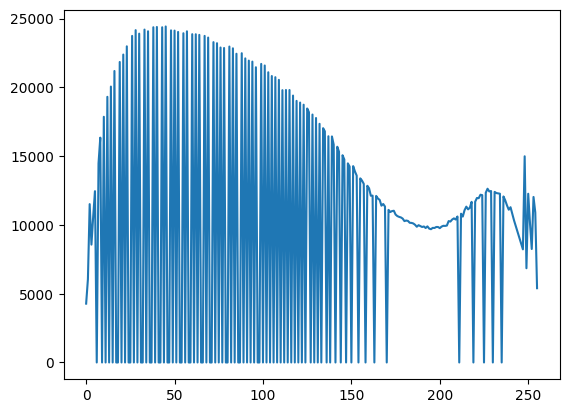

In [32]:
hist_values = cv.calcHist([equalized_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

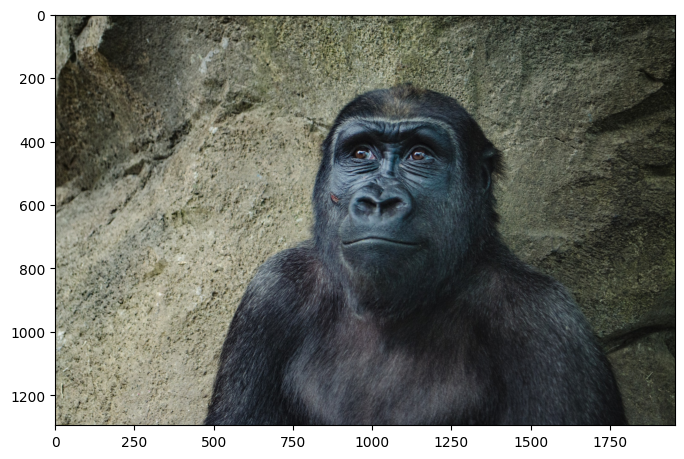

In [33]:
colored_gorilla = cv.imread('../computer_vision/DATA/gorilla.jpg')
show_gorilla = cv.cvtColor(colored_gorilla,cv.COLOR_BGR2RGB)
display_img(show_gorilla)

In [34]:
hsv = cv.cvtColor(colored_gorilla,cv.COLOR_BGR2HSV)
hsv[:,:,2].min() # value channel

1

In [35]:
hsv[:,:,2].max()

255

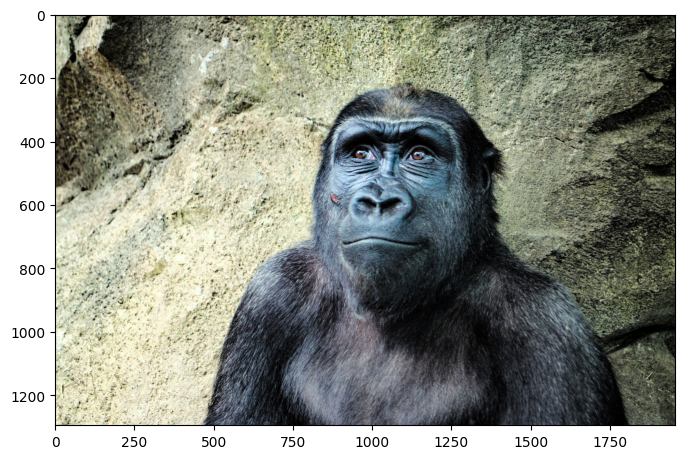

In [36]:
hsv[:,:,2] = cv.equalizeHist(hsv[:,:,2])
equalized_color_gorilla = cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
display_img(equalized_color_gorilla)
